In [53]:
import pickle
import os
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set up the different data paths
ROOT = "c:/Users/summe/Git Repos/ml-agricultural-census-utah"
DATA_DIR = os.path.join(ROOT, "initial_analysis")
MODEL_EVAL_DIR = os.path.join(ROOT, "ml_model_finetuning")
MODEL_DIR = os.path.join(MODEL_EVAL_DIR, "models")
DATASET_PREDICT = os.path.join(DATA_DIR, "wheat_prod_unlabeled.csv")
DATASET_LABELED = os.path.join(DATA_DIR, "wheat_prod_labeled.csv")
XGB_MODEL = os.path.join(MODEL_DIR, "agricultural_census_model_xgb.pkl")

# Show the current paths 
print("ROOT: ", ROOT)
print("DATA_DIR: ", DATA_DIR)
print("DATASET_PREDICT: ", DATASET_PREDICT)
print("DATASET_LABELED: ", DATASET_LABELED)
print("MODEL_DIR: ", MODEL_DIR)
print("XGB_MODEL: ", XGB_MODEL)

ROOT:  c:/Users/summe/Git Repos/ml-agricultural-census-utah
DATA_DIR:  c:/Users/summe/Git Repos/ml-agricultural-census-utah\initial_analysis
DATASET_PREDICT:  c:/Users/summe/Git Repos/ml-agricultural-census-utah\initial_analysis\wheat_prod_unlabeled.csv
DATASET_LABELED:  c:/Users/summe/Git Repos/ml-agricultural-census-utah\initial_analysis\wheat_prod_labeled.csv
MODEL_DIR:  c:/Users/summe/Git Repos/ml-agricultural-census-utah\ml_model_finetuning\models
XGB_MODEL:  c:/Users/summe/Git Repos/ml-agricultural-census-utah\ml_model_finetuning\models\agricultural_census_model_xgb.pkl


In [3]:
# preview the prediction dataset
df = pd.read_csv(DATASET_PREDICT)
df.head()

,year,county,countyansi,wheatprod,pop,wheatprice,wheatprice_l1,wheatprice_l2,precipitation,maximum_temperature,...,county23,county24,county25,county26,county27,year1,year2,year3,year4,year5
0,2002,beaver,1,NaN,6058,4.65,3.30,3.25,7.80,64.400002,...,0,0,0,0,0,1,0,0,0,0
1,2007,beaver,1,NaN,6266,8.30,4.85,3.80,9.84,64.599998,...,0,0,0,0,0,0,1,0,0,0
2,2017,beaver,1,NaN,6402,5.20,4.30,5.18,11.37,65.400002,...,0,0,0,0,0,0,0,0,1,0
3,2022,beaver,1,NaN,7327,9.15,7.10,5.43,10.76,64.500000,...,0,0,0,0,0,0,0,0,0,1
4,2002,carbon,7,NaN,20114,4.65,3.30,3.25,9.84,58.000000,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# show the column names
df.columns

Index(['year', 'county', 'countyansi', 'wheatprod', 'pop', 'wheatprice',
       'wheatprice_l1', 'wheatprice_l2', 'precipitation',
       'maximum_temperature', 'palmer_modified_drought_index_pm',
       'average_temperature', 'palmer_zindex', 'minimum_temperature',
       'palmer_hydrological_drought_inde', 'palmer_drought_severity_index_pd',
       'heating_degree_days', 'cooling_degree_days', 'precipitation_l1',
       'precipitation_l2', 'allindustrytotal', 'privateindustries',
       'agricultureforestryfishingandhun', 'miningquarryingandoilandgasextra',
       'utilities', 'construction', 'manufacturing',
       'durablegoodsmanufacturing', 'nondurablegoodsmanufacturing',
       'wholesaletrade', 'retailtrade', 'transportationandwarehousing',
       'information', 'financeinsurancerealestaterental',
       'financeandinsurance', 'realestateandrentalandleasing',
       'professionalandbusinessservices', 'professionalscientificandtechnic',
       'managementofcompaniesandenterpri',

In [5]:
# check wheat production unique values
print(df['wheatprod'].unique())
# check logwheatprod unique values
print(df['logwheatprod'].unique())


[nan]
[nan]


In [6]:
# show any missing values by column that have more than 0 missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
print(missing)

wheatprod       36
logwheatprod    36
dtype: int64


In [7]:
county = df['county']

In [8]:
df = df.drop(columns=['logwheatprod', 'wheatprod', 'county'])
df.head()

,year,countyansi,pop,wheatprice,wheatprice_l1,wheatprice_l2,precipitation,maximum_temperature,palmer_modified_drought_index_pm,average_temperature,...,county23,county24,county25,county26,county27,year1,year2,year3,year4,year5
0,2002,1,6058,4.65,3.30,3.25,7.80,64.400002,-3.04,49.700001,...,0,0,0,0,0,1,0,0,0,0
1,2007,1,6266,8.30,4.85,3.80,9.84,64.599998,-1.04,50.000000,...,0,0,0,0,0,0,1,0,0,0
2,2017,1,6402,5.20,4.30,5.18,11.37,65.400002,-2.19,51.299999,...,0,0,0,0,0,0,0,0,1,0
3,2022,1,7327,9.15,7.10,5.43,10.76,64.500000,0.35,50.000000,...,0,0,0,0,0,0,0,0,0,1
4,2002,7,20114,4.65,3.30,3.25,9.84,58.000000,-0.96,44.799999,...,0,0,0,0,0,1,0,0,0,0


In [40]:
# show the unique year and county rows combinations in the same line
print(df.groupby(['year', 'county']).size())


year  county    
2002  beaver        1
      carbon        1
      duchesne      1
      emery         1
      iron          1
      sanpete       1
      summit        1
      uintah        1
      washington    1
2007  beaver        1
      carbon        1
      emery         1
      iron          1
      sevier        1
      tooele        1
      uintah        1
      wasatch       1
      wayne         1
2012  duchesne      1
      summit        1
2017  beaver        1
      carbon        1
      emery         1
      morgan        1
      piute         1
      sevier        1
      summit        1
      tooele        1
      wasatch       1
      washington    1
2022  beaver        1
      carbon        1
      duchesne      1
      garfield      1
      piute         1
      tooele        1
dtype: int64


In [9]:
# create feature matrix
X = df

# scaled features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# load the model
with open(XGB_MODEL, 'rb') as file:
    model = pickle.load(file)

# make predictions
y_pred = model.predict(X_scaled)

# add the predictions to the dataframe
df['wheatprod'] = y_pred

In [10]:
df['county'] = county
df

,year,countyansi,pop,wheatprice,wheatprice_l1,wheatprice_l2,precipitation,maximum_temperature,palmer_modified_drought_index_pm,average_temperature,...,county25,county26,county27,year1,year2,year3,year4,year5,wheatprod,county
0,2002,1,6058,4.65,3.30,3.25,7.800000,64.400002,-3.04,49.700001,...,0,0,0,1,0,0,0,0,57504.929688,beaver
1,2007,1,6266,8.30,4.85,3.80,9.840000,64.599998,-1.04,50.000000,...,0,0,0,0,1,0,0,0,79492.726562,beaver
2,2017,1,6402,5.20,4.30,5.18,11.370000,65.400002,-2.19,51.299999,...,0,0,0,0,0,0,1,0,130114.820312,beaver
3,2022,1,7327,9.15,7.10,5.43,10.760000,64.500000,0.35,50.000000,...,0,0,0,0,0,0,0,1,77784.351562,beaver
4,2002,7,20114,4.65,3.30,3.25,9.840000,58.000000,-0.96,44.799999,...,0,0,0,1,0,0,0,0,30510.697266,carbon
5,2007,7,20554,8.30,4.85,3.80,11.900000,59.200001,-1.36,46.099998,...,0,0,0,0,1,0,0,0,58070.675781,carbon
6,2017,7,20171,5.20,4.30,5.18,13.670000,59.400002,-2.73,46.799999,...,0,0,0,0,0,0,1,0,152307.187500,carbon
7,2022,7,20571,9.15,7.10,5.43,11.840000,58.700001,-1.70,45.599998,...,0,0,0,0,0,0,0,1,81275.078125,carbon
8,2002,13,14969,4.65,3.30,3.25,12.460000,54.400002,-2.13,41.500000,...,0,0,0,1,0,0,0,0,6387.474609,duchesne
9,2012,13,18999,9.59,8.26,7.43,12.350000,56.799999,-3.53,44.000000,...,0,0,0,0,0,1,0,0,40365.273438,duchesne


In [14]:
# preview the labeled dataset
df_labeled = pd.read_csv(DATASET_LABELED)
df_labeled[df_labeled['county'] == 'beaver']

,year,county,countyansi,wheatprod,pop,wheatprice,wheatprice_l1,wheatprice_l2,precipitation,maximum_temperature,...,county23,county24,county25,county26,county27,year1,year2,year3,year4,year5
0,2012,beaver,1,53666,6500,9.59,8.26,7.43,11.54,65.400002,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# merge the two datasets
df_combined = pd.concat([df, df_labeled], axis=0)
#sort by county and year
df_combined = df_combined.sort_values(['county', 'year'])


,year,logwheatprod,countyansi,pop,wheatprice,wheatprice_l1,wheatprice_l2,precipitation,maximum_temperature,palmer_modified_drought_index_pm,...,county25,county26,county27,year1,year2,year3,year4,year5,wheatprod,county
0,2002,NaN,1,6058,4.65,3.30,3.25,7.800000,64.400002,-3.04,...,0,0,0,1,0,0,0,0,57504.929688,beaver
1,2007,NaN,1,6266,8.30,4.85,3.80,9.840000,64.599998,-1.04,...,0,0,0,0,1,0,0,0,79492.726562,beaver
0,2012,10.890535,1,6500,9.59,8.26,7.43,11.540000,65.400002,-1.73,...,0,0,0,0,0,1,0,0,53666.000000,beaver
2,2017,NaN,1,6402,5.20,4.30,5.18,11.370000,65.400002,-2.19,...,0,0,0,0,0,0,1,0,130114.820312,beaver
3,2022,NaN,1,7327,9.15,7.10,5.43,10.760000,64.500000,0.35,...,0,0,0,0,0,0,0,1,77784.351562,beaver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2002,11.492957,57,203045,4.65,3.30,3.25,20.709999,56.900002,-2.67,...,0,0,1,1,0,0,0,0,98023.000000,weber
66,2007,12.024095,57,217567,8.30,4.85,3.80,21.930000,59.299999,-1.50,...,0,0,1,0,1,0,0,0,166724.000000,weber
67,2012,12.451565,57,236268,9.59,8.26,7.43,21.440001,60.200001,-2.52,...,0,0,1,0,0,1,0,0,255650.000000,weber
68,2017,11.494761,57,251474,5.20,4.30,5.18,32.060001,59.299999,-2.20,...,0,0,1,0,0,0,1,0,98200.000000,weber


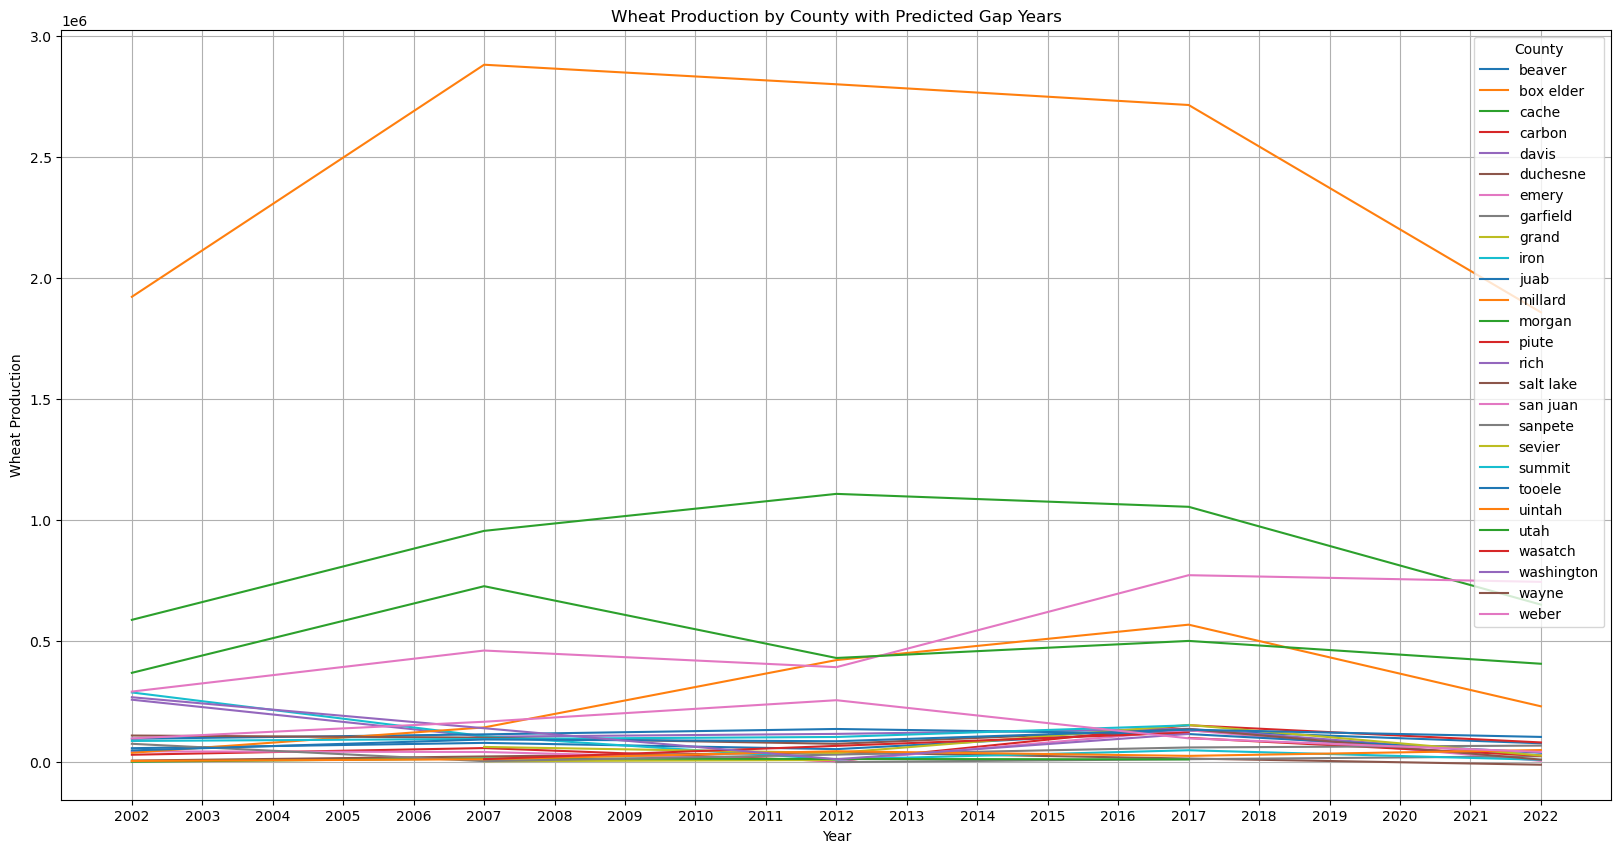

In [32]:
# plot the wheat production for each county in a line graph with year on the x-axis
plt.figure(figsize=(20, 10))
for county in df_combined['county'].unique():
    df_county = df_combined[df_combined['county'] == county]
    plt.plot(df_county['year'], df_county['wheatprod'], label=county)
plt.xlabel('Year')
plt.xticks(np.arange(2002, 2023, 1))
plt.ylabel('Wheat Production')
plt.title('Wheat Production by County with Predicted Gap Years')
plt.legend(title='County',loc='upper right')
plt.grid()
plt.show()

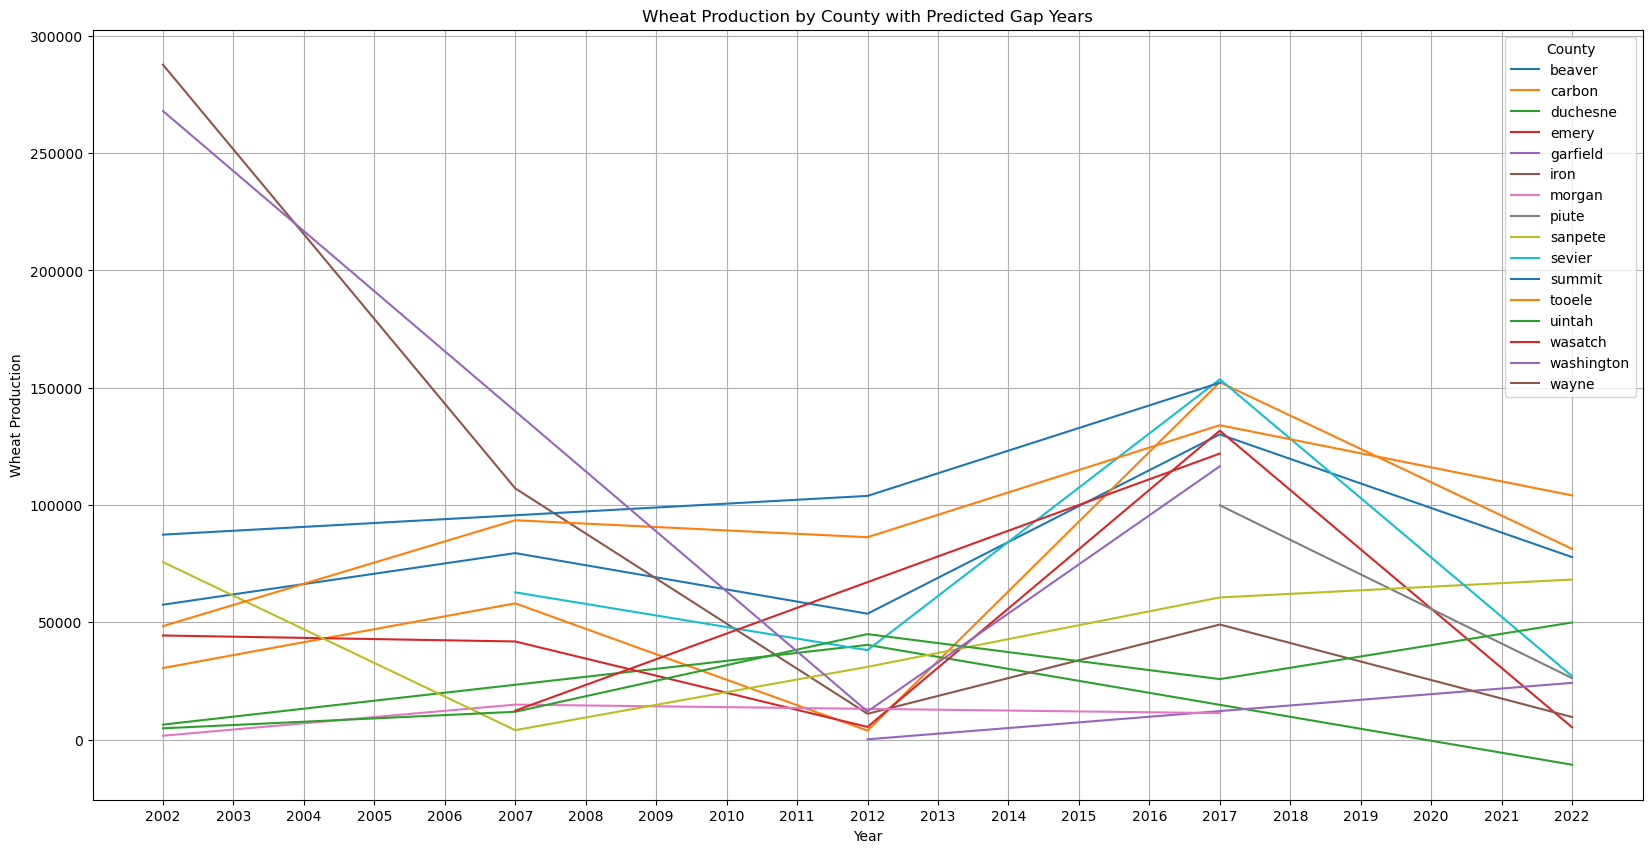

In [41]:
# do the same plot but resticted to these counties
#  Beaver
# Carbon
# Duchesne
# Emery
# Garfield
# Iron
# Morgan
# Piute
# Sanpete
# Sevier
# Summit
# Tooele
# Uintah
# Wasatch
# Washington
# Wayne

counties = ['beaver', 'carbon', 'duchesne', 'emery', 'garfield', 'iron', 'morgan', 'piute', 'sanpete', 'sevier', 'summit', 'tooele', 'uintah', 'wasatch', 'washington', 'wayne']

plt.figure(figsize=(20, 10))
for county in counties:
    df_county = df_combined[df_combined['county'] == county]
    plt.plot(df_county['year'], df_county['wheatprod'], label=county)
plt.xlabel('Year')
plt.xticks(np.arange(2002, 2023, 1))
plt.ylabel('Wheat Production')
plt.title('Wheat Production by County with Predicted Gap Years')
plt.legend(title='County',loc='upper right')
plt.grid()
plt.show()



In [42]:
# show the dataframe for those counties
df_combined[df_combined['county'].isin(counties)]

,year,logwheatprod,countyansi,pop,wheatprice,wheatprice_l1,wheatprice_l2,precipitation,maximum_temperature,palmer_modified_drought_index_pm,...,county25,county26,county27,year1,year2,year3,year4,year5,wheatprod,county
0,2002,NaN,1,6058,4.65,3.30,3.25,7.800000,64.400002,-3.04,...,0,0,0,1,0,0,0,0,57504.929688,beaver
1,2007,NaN,1,6266,8.30,4.85,3.80,9.840000,64.599998,-1.04,...,0,0,0,0,1,0,0,0,79492.726562,beaver
0,2012,10.890535,1,6500,9.59,8.26,7.43,11.540000,65.400002,-1.73,...,0,0,0,0,0,1,0,0,53666.000000,beaver
2,2017,NaN,1,6402,5.20,4.30,5.18,11.370000,65.400002,-2.19,...,0,0,0,0,0,0,1,0,130114.820312,beaver
3,2022,NaN,1,7327,9.15,7.10,5.43,10.760000,64.500000,0.35,...,0,0,0,0,0,0,0,1,77784.351562,beaver
4,2002,NaN,7,20114,4.65,3.30,3.25,9.840000,58.000000,-0.96,...,0,0,0,1,0,0,0,0,30510.697266,carbon
5,2007,NaN,7,20554,8.30,4.85,3.80,11.900000,59.200001,-1.36,...,0,0,0,0,1,0,0,0,58070.675781,carbon
11,2012,8.246434,7,21226,9.59,8.26,7.43,10.610000,60.500000,-3.26,...,0,0,0,0,0,1,0,0,3814.000000,carbon
6,2017,NaN,7,20171,5.20,4.30,5.18,13.670000,59.400002,-2.73,...,0,0,0,0,0,0,1,0,152307.187500,carbon
7,2022,NaN,7,20571,9.15,7.10,5.43,11.840000,58.700001,-1.70,...,0,0,0,0,0,0,0,1,81275.078125,carbon


In [43]:
df_combined.columns

Index(['year', 'logwheatprod', 'countyansi', 'pop', 'wheatprice',
       'wheatprice_l1', 'wheatprice_l2', 'precipitation',
       'maximum_temperature', 'palmer_modified_drought_index_pm',
       'average_temperature', 'palmer_zindex', 'minimum_temperature',
       'palmer_hydrological_drought_inde', 'palmer_drought_severity_index_pd',
       'heating_degree_days', 'cooling_degree_days', 'precipitation_l1',
       'precipitation_l2', 'allindustrytotal', 'privateindustries',
       'agricultureforestryfishingandhun', 'miningquarryingandoilandgasextra',
       'utilities', 'construction', 'manufacturing',
       'durablegoodsmanufacturing', 'nondurablegoodsmanufacturing',
       'wholesaletrade', 'retailtrade', 'transportationandwarehousing',
       'information', 'financeinsurancerealestaterental',
       'financeandinsurance', 'realestateandrentalandleasing',
       'professionalandbusinessservices', 'professionalscientificandtechnic',
       'managementofcompaniesandenterpri', 'admin

In [44]:
df = df_combined.reindex(columns=['year', 'county', 'wheatprod', 'logwheatprod', 'countyansi', 'pop', 'wheatprice',
       'wheatprice_l1', 'wheatprice_l2', 'precipitation',
       'maximum_temperature', 'palmer_modified_drought_index_pm',
       'average_temperature', 'palmer_zindex', 'minimum_temperature',
       'palmer_hydrological_drought_inde', 'palmer_drought_severity_index_pd',
       'heating_degree_days', 'cooling_degree_days', 'precipitation_l1',
       'precipitation_l2', 'allindustrytotal', 'privateindustries',
       'agricultureforestryfishingandhun', 'miningquarryingandoilandgasextra',
       'utilities', 'construction', 'manufacturing',
       'durablegoodsmanufacturing', 'nondurablegoodsmanufacturing',
       'wholesaletrade', 'retailtrade', 'transportationandwarehousing',
       'information', 'financeinsurancerealestaterental',
       'financeandinsurance', 'realestateandrentalandleasing',
       'professionalandbusinessservices', 'professionalscientificandtechnic',
       'managementofcompaniesandenterpri', 'administrativeandsupportandwaste',
       'educationalserviceshealthcareand', 'educationalservices',
       'healthcareandsocialassistance', 'artsentertainmentrecreationaccom',
       'artsentertainmentandrecreation', 'accommodationandfoodservices',
       'otherservicesexceptgovernmentand', 'governmentandgovernmententerpris',
       'countycode', 'county1', 'county2', 'county3', 'county4', 'county5',
       'county6', 'county7', 'county8', 'county9', 'county10', 'county11',
       'county12', 'county13', 'county14', 'county15', 'county16', 'county17',
       'county18', 'county19', 'county20', 'county21', 'county22', 'county23',
       'county24', 'county25', 'county26', 'county27', 'year1', 'year2',
       'year3', 'year4', 'year5'])
df

,year,county,wheatprod,logwheatprod,countyansi,pop,wheatprice,wheatprice_l1,wheatprice_l2,precipitation,...,county23,county24,county25,county26,county27,year1,year2,year3,year4,year5
0,2002,beaver,57504.929688,NaN,1,6058,4.65,3.30,3.25,7.800000,...,0,0,0,0,0,1,0,0,0,0
1,2007,beaver,79492.726562,NaN,1,6266,8.30,4.85,3.80,9.840000,...,0,0,0,0,0,0,1,0,0,0
0,2012,beaver,53666.000000,10.890535,1,6500,9.59,8.26,7.43,11.540000,...,0,0,0,0,0,0,0,1,0,0
2,2017,beaver,130114.820312,NaN,1,6402,5.20,4.30,5.18,11.370000,...,0,0,0,0,0,0,0,0,1,0
3,2022,beaver,77784.351562,NaN,1,7327,9.15,7.10,5.43,10.760000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2002,weber,98023.000000,11.492957,57,203045,4.65,3.30,3.25,20.709999,...,0,0,0,0,1,1,0,0,0,0
66,2007,weber,166724.000000,12.024095,57,217567,8.30,4.85,3.80,21.930000,...,0,0,0,0,1,0,1,0,0,0
67,2012,weber,255650.000000,12.451565,57,236268,9.59,8.26,7.43,21.440001,...,0,0,0,0,1,0,0,1,0,0
68,2017,weber,98200.000000,11.494761,57,251474,5.20,4.30,5.18,32.060001,...,0,0,0,0,1,0,0,0,1,0


In [48]:
df[df['county'] == 'summit']

,year,county,wheatprod,logwheatprod,countyansi,pop,wheatprice,wheatprice_l1,wheatprice_l2,precipitation,...,county23,county24,county25,county26,county27,year1,year2,year3,year4,year5
23,2002,summit,87366.328125,NaN,43,31536,4.65,3.30,3.25,19.420000,...,0,0,0,0,0,1,0,0,0,0
24,2012,summit,103881.945312,NaN,43,37886,9.59,8.26,7.43,19.959999,...,0,0,0,0,0,0,0,1,0,0
25,2017,summit,152103.609375,NaN,43,41375,5.20,4.30,5.18,28.740000,...,0,0,0,0,0,0,0,0,1,0


In [49]:
df.to_csv('wheat_prod_predicted_dataset.csv', index=False)

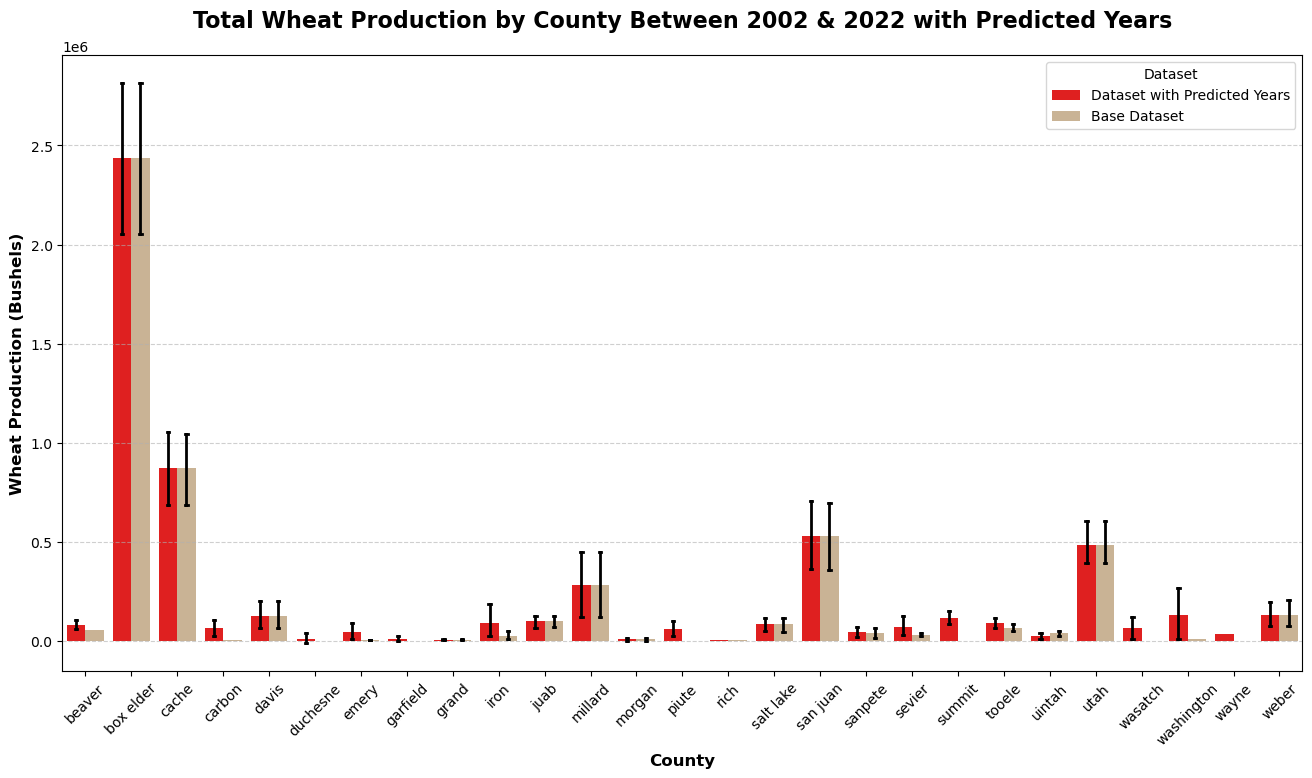

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate the DataFrames
df['dataset'] = 'Dataset with Predicted Years'
df_labeled['dataset'] = 'Base Dataset'
combined_df = pd.concat([df, df_labeled])

# Create the bar plot
plt.figure(figsize=(16,8))
sns.barplot(x='county', y='wheatprod', hue='dataset', data=combined_df, palette={'Base Dataset': 'tan', 'Dataset with Predicted Years': 'red'}, 
            err_kws={'color': 'black', 'linewidth': 2}, capsize=0.1)
plt.title("Total Wheat Production by County Between 2002 & 2022 with Predicted Years", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("County", fontsize=12, fontweight='bold')
plt.ylabel("Wheat Production (Bushels)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Dataset')
plt.show()
